In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.compose import ColumnTransformer
import statsmodels.api as sma
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn import tree
from scipy.stats import randint

In [31]:
df1=pd.read_csv("df_trim.csv")
df1.head()

,product_id,time_id,customer_id,promotion_id,store_id,store_sales,store_cost,unit_sales,product_class_id,brand_name,...,houseowner,num_cars_owned,fullname,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch,promotion_period
0,451,677,7366,207,3,7.12,2.2784,4,55,Red Wing,...,Y,4,Ann Smith,11/7/1997,Friday,1997,11,7,34279,4
1,1293,677,7366,207,3,5.76,1.7856,4,14,Booker,...,Y,4,Ann Smith,11/7/1997,Friday,1997,11,7,34279,4
2,738,677,7366,207,3,5.55,2.0535,3,39,Consolidated,...,Y,4,Ann Smith,11/7/1997,Friday,1997,11,7,34279,4
3,1426,677,8947,207,3,7.48,2.2440,2,61,Hermanos,...,Y,2,Robert Bell,11/7/1997,Friday,1997,11,7,34279,4
4,338,677,8947,207,3,2.28,1.0488,4,58,Better,...,Y,2,Robert Bell,11/7/1997,Friday,1997,11,7,34279,4


In [32]:
#Impute null values with median for specified columns
columns_to_impute = ['store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft']
imputer = SimpleImputer(strategy='median')
df1[columns_to_impute] = imputer.fit_transform(df1[columns_to_impute])

In [33]:
# Check for remaining null values
df_null = df1.isnull().sum()
df_null

product_id          0
time_id             0
customer_id         0
promotion_id        0
store_id            0
                   ..
the_year            0
the_month           0
day_of_month        0
day_since_epoch     0
promotion_period    0
Length: 94, dtype: int64

In [34]:
# Remove specified columns
columns_to_remove = ["lname", "fname", "mi", "address1", "address2"]
df1 = df1.drop(columns=columns_to_remove)

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70751 entries, 0 to 70750
Data columns (total 89 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             70751 non-null  int64  
 1   time_id                70751 non-null  int64  
 2   customer_id            70751 non-null  int64  
 3   promotion_id           70751 non-null  int64  
 4   store_id               70751 non-null  int64  
 5   store_sales            70751 non-null  float64
 6   store_cost             70751 non-null  float64
 7   unit_sales             70751 non-null  int64  
 8   product_class_id       70751 non-null  int64  
 9   brand_name             70751 non-null  object 
 10  product_name           70751 non-null  object 
 11  SKU                    70751 non-null  int64  
 12  SRP                    70751 non-null  float64
 13  gross_weight           70751 non-null  float64
 14  net_weight             70751 non-null  float64
 15  re

# trying model with 56 columns where id columns, date columns are removed.

In [36]:
df_old=df1[['store_sales', 'store_cost', 'unit_sales','brand_name', 'product_name','SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'cases_per_pallet', 'shelf_width', 'shelf_height', 'shelf_depth',
       'subcategory', 'category', 'department', 'family','promotion_name', 'media_type', 'cost','sales_city',
       'sales_state_province', 'sales_district', 'sales_region',
       'sales_country','store_type', 'store_name','store_city', 'store_state','store_country', 'store_manager','store_sqft',
       'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store',
       'salad_bar', 'prepared_food', 'florist','city',
       'state_province','country','marital_status', 'yearly_income',
       'gender', 'total_children', 'num_children_at_home', 'education','member_card', 'occupation', 'houseowner',
       'num_cars_owned','promotion_period']]

In [37]:
df_old=pd.get_dummies(df_old,drop_first=True)

In [38]:
X = df_old.drop(columns=['cost'])
y = df_old['cost']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [40]:
model_lr=sma.OLS(y_train,sma.add_constant(X_train)).fit()

In [41]:
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     16.80
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        11:13:47   Log-Likelihood:            -5.2073e+05
No. Observations:               56600   AIC:                         1.045e+06
Df Residuals:                   54843   BIC:                         1.061e+06
Df Model:                        1756                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                      839.3743     18.892     44.429      0.000     802.345     876.403
store_sales                                                 -9.1742     16.436     -0.558      0.577     -41.388      23.040
store_cost                                                  -0.9605     23.898     -0.040      0.968     -47.801      45.880
unit_sales                                                  10.6723     31.299      0.341      0.733     -50.673      72.018
SRP                                                         44.6849     42.907      1.041      0.298     -39.413     128.783
gross_weight                                                16.8586     15.661      1.076      0.282     -13.836      47.554
net_weight                                                 -16.9021     15.474     -1.092      0.275     -47.232      13.428
recyclable_package                                           0.7210     22.136      0.033      0.974     -42.666      44.108
low_fat                                                     -2.0086     25.547     -0.079      0.937     -52.082      48.064
units_per_case                                               0.8682      1.068      0.813      0.416      -1.225       2.962
cases_per_pallet                                            -0.5964      4.468     -0.133      0.894      -9.353       8.160
shelf_width                                                 -0.1472      1.914     -0.077      0.939      -3.900       3.605
shelf_height                                                -1.5349      2.012     -0.763      0.446      -5.479       2.409
shelf_depth                                                 -1.9977      1.953     -1.023      0.306      -5.826       1.831
store_sqft                                                   0.0616      0.074      0.837      0.403      -0.083       0.206
grocery_sqft                                                 0.2150      0.073      2.941      0.003       0.072       0.358
frozen_sqft                                               -175.6083     14.522    -12.093      0.000    -204.071    -147.146
meat_sqft                                                  263.7268     21.794     12.101      0.000     221.011     306.443
coffee_bar                                                 619.0695     20.412     30.329      0.000     579.062     659.077
video_store                                                166.7150     24.221      6.883      0.000     119.242     214.188
salad_bar                                                 -321.5952     13.740    -23.407      0.000    -348.525    -294.666
prepared_food                                               -9.6442     12.048     

In [42]:

significant_pvalues = model_lr.pvalues[model_lr.pvalues < 0.05]

# Print the significant p-values
if not significant_pvalues.empty:
    print("Significant p-values:")
    print(significant_pvalues)
else:
    print("No significant p-values.")


Significant p-values:
const                             0.000000e+00
grocery_sqft                      3.272296e-03
frozen_sqft                       1.269854e-33
meat_sqft                         1.152545e-33
coffee_bar                       2.188079e-200
                                     ...      
education_Graduate Degree         4.107917e-03
education_High School Degree      1.045401e-03
education_Partial High School     4.555008e-05
member_card_Normal                7.084909e-03
occupation_Skilled Manual         3.023959e-02
Length: 356, dtype: float64


In [43]:
len(significant_pvalues)

356

In [44]:
ypred_train=model_lr.predict(sma.add_constant(X_train))
ypred_test=model_lr.predict(sma.add_constant(X_test))

In [45]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 5736717.718581464
Mean squared error for test data: 6111309.366235408


In [46]:
from sklearn.model_selection import cross_val_score
model_lr=LinearRegression()
# Example: Cross-validation with 3 folds
scores = cross_val_score(model_lr, X, y, cv=3, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", -scores)


Cross-validated RMSE: [10518113.65464491 11878200.99073404 12296816.92150134]


In [47]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

10518113.654644908 12296816.921501342 11564377.188960098


* there is high variance across MSE scores.

# decision tree regressor

In [48]:
dtr=DecisionTreeRegressor(random_state=42)
model_dtr=dtr.fit(X_train,y_train)

In [49]:
ypred_train=model_dtr.predict(X_train)
ypred_test=model_dtr.predict(X_test)

In [50]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 0.0
Mean squared error for test data: 0.0


In [52]:
# Example: Cross-validation with 3 folds
scores = cross_val_score(DecisionTreeRegressor(random_state=42), X, y, cv=3, scoring='neg_mean_squared_error')
print("Cross-validated MSE:", -scores)

Cross-validated MSE: [10452143.79515773 11239423.81724898 15506576.50303184]


In [53]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

10452143.795157734 15506576.503031844 12399381.371812852


[Text(0.9461769328704155, 0.9895833333333334, 'x[1888] <= 0.5\nsquared_error = 8822654.652\nsamples = 56600\nvalue = 9958.445'),
 Text(0.9091535297475508, 0.96875, 'x[1905] <= 0.5\nsquared_error = 8759499.37\nsamples = 55291\nvalue = 10030.002'),
 Text(0.8712260011162691, 0.9479166666666666, 'x[1881] <= 0.5\nsquared_error = 8699211.452\nsamples = 54088\nvalue = 10089.752'),
 Text(0.8331701878688257, 0.9270833333333334, 'x[1910] <= 0.5\nsquared_error = 8633547.105\nsamples = 52907\nvalue = 10151.101'),
 Text(0.7923378557880503, 0.90625, 'x[1872] <= 0.5\nsquared_error = 8526150.168\nsamples = 49605\nvalue = 10028.401'),
 Text(0.7602322004463231, 0.8854166666666666, 'x[25] <= 16.5\nsquared_error = 8419510.968\nsamples = 48305\nvalue = 10103.772'),
 Text(0.7195404193722766, 0.8645833333333334, 'x[1894] <= 0.5\nsquared_error = 8290515.398\nsamples = 47057\nvalue = 10173.071'),
 Text(0.6549565212309035, 0.84375, 'x[1921] <= 0.5\nsquared_error = 8202180.349\nsamples = 45067\nvalue = 10253.214

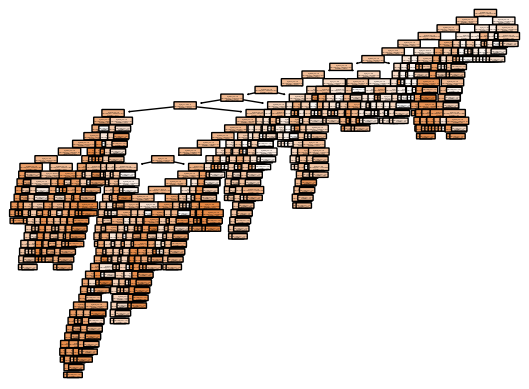

In [54]:
tree.plot_tree(model_dtr,filled=True, rounded=True)

# Regularization using Hyperparameter tuning

In [55]:
dtr = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [5, 15, 25],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 8, 12]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)





KeyboardInterrupt: 

In [23]:
# Evaluate the model on the test set
dtr_gcv=DecisionTreeRegressor(random_state=42,**grid_search.best_params_)
model_dtr=dtr_gcv.fit(X_train,y_train)

In [24]:
ypred_train=dtr_gcv.predict(X_train)
ypred_test=dtr_gcv.predict(X_test)

In [25]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 1400363.9895034693
Mean squared error for test data: 1399686.6302196528


In [26]:
# Example: Cross-validation with 5 folds
scores = cross_val_score(dtr_gcv, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE:", -scores)

Cross-validated MSE: [ 9515777.03978463 12951244.86682166 11567435.09039036 11666715.79748654
 12182377.54642086]


In [27]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

9515777.03978463 12951244.866821663 11576710.06818081


In [28]:
dtr = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [15, 25,35],
    'min_samples_split': [3,5,7],
    'min_samples_leaf': [1,2,3]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 35, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [29]:
# Evaluate the model on the test set
dtr_gcv=DecisionTreeRegressor(random_state=42,**grid_search.best_params_)
model_dtr=dtr_gcv.fit(X_train,y_train)

In [30]:
ypred_train=dtr_gcv.predict(X_train)
ypred_test=dtr_gcv.predict(X_test)

In [31]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 170083.7819072488
Mean squared error for test data: 176404.0630097663


In [32]:
# Example: Cross-validation with 5 folds
scores = cross_val_score(dtr_gcv, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE:", -scores)

Cross-validated MSE: [10645236.41834218 11451570.03223477 12422227.6194688  12943488.98785798
 12760127.98567791]


In [33]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

10645236.41834218 12943488.98785798 12044530.20871633


In [34]:
dtr = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [25,35,45],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [0,1,2]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
27 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py", line 

Best Hyperparameters: {'max_depth': 45, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [35]:
# Evaluate the model on the test set
dtr_gcv=DecisionTreeRegressor(random_state=42,**grid_search.best_params_)
model_dtr=dtr_gcv.fit(X_train,y_train)

In [36]:
ypred_train=dtr_gcv.predict(X_train)
ypred_test=dtr_gcv.predict(X_test)

In [37]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 7961.35123001932
Mean squared error for test data: 9352.212985420627


In [38]:
# Example: Cross-validation with 5 folds
scores = cross_val_score(dtr_gcv, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE:", -scores)

Cross-validated MSE: [10887694.85407392 11872594.00939929 12169680.26699647 12071853.13618375
 12815870.77540636]


In [39]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

10887694.854073917 12815870.77540636 11963538.608411957


# Random Forest Regressor

In [56]:
rfr=RandomForestRegressor(random_state=42,n_jobs=-1)
model_rfr=rfr.fit(X_train,y_train)

In [57]:
ypred_train=model_rfr.predict(X_train)
ypred_test=model_rfr.predict(X_test)

In [58]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 44.53944897879855
Mean squared error for test data: 387.6199946152213


In [59]:
# Example: Cross-validation with 3 folds
scores = cross_val_score(RandomForestRegressor(random_state=42,n_jobs=-1), X, y, cv=3, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", -scores)

Cross-validated RMSE: [ 8169597.98300746 10962791.4096375  10725452.30074407]


In [60]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

8169597.983007462 10962791.4096375 9952613.897796342


# Regularization using Hyperparameter tuning

rfr=RandomForestRegressor(random_state=42,n_jobs=-1)

# Define the hyperparameter grid to search
param_grid = {"n_estimators":[50,100,150],
    'max_depth': [15,25,35],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2,8,12]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


In [42]:
sample_size = 14000
X_train_sample = X_train.sample(n=sample_size, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

In [43]:
rfr=RandomForestRegressor(random_state=42,n_jobs=-1)

# Define the hyperparameter grid to search
param_grid = {'max_depth': [15,25,35], 'min_samples_split': [5, 10, 15], 'min_samples_leaf': [2,8,12] }

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train_sample, y_train_sample)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

KeyboardInterrupt: 

In [ ]:
# Evaluate the model on the test set
rfr_gcv=RandomForestRegressor(random_state=42,**grid_search.best_params_,n_jobs=-1)
model_rfr=rfr.fit(X_train,y_train)

In [ ]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

In [ ]:
# Example: Cross-validation with 3 folds
scores = cross_val_score(rfr_gcv, X, y, cv=3, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", -scores)

In [ ]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

# Ada Boost regressor

In [61]:
abr=AdaBoostRegressor(random_state=42)
model_abr=abr.fit(X_train,y_train)

In [62]:
ypred_train=model_abr.predict(X_train)
ypred_test=model_abr.predict(X_test)

In [63]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 8196164.790749507
Mean squared error for test data: 8226441.134913289


In [64]:
# Example: Cross-validation with 3 folds
scores = cross_val_score(AdaBoostRegressor(random_state=42), X, y, cv=3, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", -scores)

Cross-validated RMSE: [ 8843075.83569943 10259185.40941612  8573791.23387841]


In [66]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

8573791.233878408 10259185.409416124 9225350.82633132


In [33]:
abr_dt=AdaBoostRegressor(estimator=dtr,random_state=42)
model_abr_dt=abr_dt.fit(X_train,y_train)

In [34]:
ypred_train=model_abr_dt.predict(X_train)
ypred_test=model_abr_dt.predict(X_test)

In [35]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 0.0
Mean squared error for test data: 0.0


# Gradient boost regressor

In [67]:
gbr=GradientBoostingRegressor(random_state=42)
model_gbr=gbr.fit(X_train,y_train)

In [68]:
ypred_train=model_gbr.predict(X_train)
ypred_test=model_gbr.predict(X_test)

In [69]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 4351091.5839049835
Mean squared error for test data: 4333213.074632085


In [70]:
# Example: Cross-validation with 3 folds
scores = cross_val_score(GradientBoostingRegressor(random_state=42), X, y, cv=3, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", -scores)

Cross-validated RMSE: [7788295.38847169 9217873.07642318 9204627.04163693]


In [71]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

7788295.388471686 9217873.07642318 8736931.835510598


# XGBoost Regressor

In [72]:
xgbr=XGBRegressor(random_state=42)
model_xgbr=xgbr.fit(X_train,y_train)

In [73]:
ypred_train=model_xgbr.predict(X_train)
ypred_test=model_xgbr.predict(X_test)

In [74]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 47939.53244435877
Mean squared error for test data: 50168.94739237663


In [75]:
# Example: Cross-validation with 3 folds
scores = cross_val_score(XGBRegressor(random_state=42), X, y, cv=3, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", -scores)

Cross-validated RMSE: [ 8951351.66065674  9914391.19219184 13344145.88152744]


In [76]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

8951351.660656745 13344145.881527437 10736629.578125343


# StackingRegressor

In [77]:
base_estimators=[
    ("XGBoostRegressor", XGBRegressor(random_state=42)),
    ("RandomForestRegressor", RandomForestRegressor(random_state=42, n_jobs=-1))
]
sr=StackingRegressor(estimators=base_estimators,final_estimator=DecisionTreeRegressor(random_state=42))
model_sr=sr.fit(X_train,y_train)

In [78]:
ypred_train=model_sr.predict(X_train)
ypred_test=model_sr.predict(X_test)

In [79]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 416.40752650176677
Mean squared error for test data: 650.190304572115


In [80]:
# Example: Cross-validation with 3 folds
scores = cross_val_score(sr, X, y, cv=3, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", -scores)

Cross-validated RMSE: [15469164.51004919 16302671.54185041 13927666.75897893]


In [48]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

13759351.058135098 16523233.013059702 14966344.964397589


In [81]:
base_estimators=[
    ("DecisionTreeRegressor", DecisionTreeRegressor(random_state=42)),
    ("RandomForestRegressor", RandomForestRegressor(random_state=42, n_jobs=-1))
]
sr=StackingRegressor(estimators=base_estimators,final_estimator=XGBRegressor(random_state=42))
model_sr=sr.fit(X_train,y_train)

In [82]:
ypred_train=model_sr.predict(X_train)
ypred_test=model_sr.predict(X_test)

In [83]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 223.93173164371046
Mean squared error for test data: 221.8853787682215


In [84]:
# Example: Cross-validation with 3 folds
scores = cross_val_score(StackingRegressor(estimators=[
    ("DecisionTreeRegressor", DecisionTreeRegressor(random_state=42)),
    ("RandomForestRegressor", RandomForestRegressor(random_state=42, n_jobs=-1))
],final_estimator=XGBRegressor(random_state=42)), X, y, cv=3, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", -scores)

Cross-validated RMSE: [11304420.75018581 12583455.44749931 14279714.49633243]


In [85]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

11304420.750185808 14279714.49633243 12722530.23133918


# keeping 43 columns where names are removed

In [86]:
#Taking columns that are needed
df_new=df1[['recyclable_package', 'low_fat', 'department', 'family', 'promotion_name', 'media_type', 'sales_district', 'sales_region', 'store_type', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'state_province', 'country', 'marital_status', 'yearly_income', 'gender', 'education','member_card', 'occupation', 'houseowner','store_sales', 'store_cost', 'unit_sales', 'SRP', 'gross_weight', 'net_weight', 'units_per_case', 'cases_per_pallet', 'shelf_width', 'shelf_height', 'shelf_depth', 'cost', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'total_children', 'num_children_at_home', 'num_cars_owned', 'promotion_period']]

In [87]:
# Perform one-hot encoding using pd.get_dummies
df_new = pd.get_dummies(df_new,drop_first=True)

In [88]:
#Setting target variable
X = df_new.drop(columns=['cost'])
y = df_new['cost']

In [89]:
#Splitting train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear regression

In [90]:
model_lr=sma.OLS(y_train,sma.add_constant(X_train)).fit()

In [91]:
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     190.1
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:21:12   Log-Likelihood:            -5.2166e+05
No. Observations:               56600   AIC:                         1.044e+06
Df Residuals:                   56454   BIC:                         1.045e+06
Df Model:                         145                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   2563.4540     51.017     50.247      0.000    2463.461    2663.447
recyclable_package                       -19.9184     20.948     -0.951      0.342     -60.978      21.141
low_fat                                  -17.7235     24.123     -0.735      0.463     -65.006      29.559
coffee_bar                               964.9898     33.740     28.601      0.000     898.860    1031.120
video_store                              181.0839     49.830      3.634      0.000      83.417     278.751
salad_bar                              -1217.0944     29.530    -41.216      0.000   -1274.973   -1159.216
prepared_food                            442.1735     31.933     13.847      0.000     379.585     504.762
florist                                  736.6762     38.812     18.981      0.000     660.605     812.747
store_sales                               -8.1708     16.210     -0.504      0.614     -39.943      23.602
store_cost                                 1.8076     23.583      0.077      0.939     -44.415      48.030
unit_sales                                 6.5093     30.863      0.211      0.833     -53.983      67.002
SRP                                       36.1355     42.206      0.856      0.392     -46.589     118.860
gross_weight                              13.2265     15.085      0.877      0.381     -16.341      42.794
net_weight                               -13.4718     14.893     -0.905      0.366     -42.663      15.719
units_per_case                             0.6181      1.011      0.611      0.541      -1.363       2.599
cases_per_pallet                          -3.2760      4.192     -0.782      0.434     -11.492       4.940
shelf_width                               -0.6424      1.804     -0.356      0.722      -4.178       2.893
shelf_height                              -2.0179      1.886     -1.070      0.285      -5.714       1.678
shelf_depth                               -2.5679      1.848     -1.390      0.165      -6.189       1.053
store_sqft                                 0.7099      0.088      8.052      0.000       0.537       0.883
grocery_sqft                              -0.5035      0.086     -5.825      0.000      -0.673      -0.334
frozen_sqft                             -622.4992     25.407    -24.501      0.000    -672.298    -572.700
meat_sqft                                932.2853     38.095     24.472      0.000     857.618    1006.952
total_children                            -2.8035      7.985     -0.351      0.726     -18.455      12.848
num_children_at_home                     -10.7330     12.976     -0.827      0.408     -36.166      14.700
num_cars_owned                            62.9707     11.742      5.363      0.000     

In [92]:

significant_pvalues = model_lr.pvalues[model_lr.pvalues < 0.05]

# Print the significant p-values
if not significant_pvalues.empty:
    print("Significant p-values:")
    print(significant_pvalues)
else:
    print("No significant p-values.")

Significant p-values:
const                             0.000000e+00
coffee_bar                       1.232943e-178
video_store                       2.792642e-04
salad_bar                         0.000000e+00
prepared_food                     1.561701e-43
                                     ...      
education_Graduate Degree         2.229086e-03
education_High School Degree      1.660403e-04
education_Partial High School     2.133458e-06
member_card_Normal                7.395359e-03
occupation_Skilled Manual         3.893567e-02
Length: 118, dtype: float64


In [93]:
len(significant_pvalues)

118

In [94]:
ypred_train=model_lr.predict(sma.add_constant(X_train))
ypred_test=model_lr.predict(sma.add_constant(X_test))

In [95]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 5928549.4521700675
Mean squared error for test data: 5950235.750753188


In [96]:
# Example: Cross-validation with 3 folds
scores = cross_val_score(LinearRegression(), X, y, cv=3, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", -scores)

Cross-validated RMSE: [8.05604316e+21 1.15998463e+07 1.19380458e+07]


In [97]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

11599846.295054836 8.056043159439347e+21 2.6853477198131233e+21


# decision tree regressor
    

In [98]:
dtr=DecisionTreeRegressor(random_state=42)
model_dtr=dtr.fit(X_train,y_train)

In [99]:
ypred_train=model_dtr.predict(X_train)
ypred_test=model_dtr.predict(X_test)

In [100]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 0.0
Mean squared error for test data: 0.0


In [101]:
# Example: Cross-validation with 3 folds
scores = cross_val_score(DecisionTreeRegressor(random_state=42), X, y, cv=3, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", -scores)

Cross-validated RMSE: [11683861.1902137  11749168.35744573 13881184.57117415]


In [102]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

11683861.190213704 13881184.57117415 12438071.372944526


In [ ]:
dtr=DecisionTreeRegressor(random_state=42,max_depth=5)
model_dtr=dtr.fit(X_train,y_train)

In [ ]:
ypred_train=model_dtr.predict(X_train)
ypred_test=model_dtr.predict(X_test)

In [ ]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

# random forest regressor

In [103]:
rfr=RandomForestRegressor(random_state=42,n_jobs=-1)
model_rfr=rfr.fit(X_train,y_train)

In [104]:
ypred_train=model_rfr.predict(X_train)
ypred_test=model_rfr.predict(X_test)

In [105]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 12.495536904593608
Mean squared error for test data: 54.03387678609286


In [106]:
# Example: Cross-validation with 3 folds
scores = cross_val_score(RandomForestRegressor(random_state=42,n_jobs=-1), X, y, cv=3, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", -scores)

Cross-validated RMSE: [ 8446581.78184431 11018563.05091296 10842657.02567124]


In [107]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

8446581.781844314 11018563.050912958 10102600.619476171


# Ada Boost regressor

In [108]:
abr=AdaBoostRegressor(random_state=42)
model_abr=abr.fit(X_train,y_train)

In [109]:
ypred_train=model_abr.predict(X_train)
ypred_test=model_abr.predict(X_test)

In [110]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 8196164.790749507
Mean squared error for test data: 8226441.134913289


In [111]:
# Example: Cross-validation with 3 folds
scores = cross_val_score(AdaBoostRegressor(random_state=42), X, y, cv=3, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", -scores)

Cross-validated RMSE: [ 8843075.83569943 10428486.43792067  8573794.19780924]


In [112]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

8573794.197809236 10428486.437920665 9281785.490476443


In [67]:
abr_dt=AdaBoostRegressor(estimator=dtr,random_state=42)
model_abr_dt=abr_dt.fit(X_train,y_train)

In [68]:
ypred_train=model_abr_dt.predict(X_train)
ypred_test=model_abr_dt.predict(X_test)

In [69]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 0.0
Mean squared error for test data: 0.0


# Gradient boost regressor

In [113]:
gbr=GradientBoostingRegressor(random_state=42)
model_gbr=gbr.fit(X_train,y_train)

In [114]:
ypred_train=model_gbr.predict(X_train)
ypred_test=model_gbr.predict(X_test)

In [115]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 4396906.866531528
Mean squared error for test data: 4388953.115762485


In [116]:
# Example: Cross-validation with 3 folds
scores = cross_val_score(GradientBoostingRegressor(random_state=42), X, y, cv=3, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", -scores)

Cross-validated RMSE: [7660760.41917762 9141269.30938205 8637570.21474319]


In [117]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

7660760.41917762 9141269.309382048 8479866.647767618


# XGBoost Regressor

In [118]:
xgbr=XGBRegressor(random_state=42)
model_xgbr=xgbr.fit(X_train,y_train)

In [119]:
ypred_train=model_xgbr.predict(X_train)
ypred_test=model_xgbr.predict(X_test)

In [120]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 43091.47010950579
Mean squared error for test data: 44229.58763469607


In [121]:
# Example: Cross-validation with 3 folds
scores = cross_val_score(XGBRegressor(random_state=42), X, y, cv=3, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", -scores)

Cross-validated RMSE: [ 8012337.50938335 10438197.63082928 12475952.66319641]


In [122]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

8012337.509383353 12475952.663196405 10308829.267803013


# StackingRegressor

In [123]:
base_estimators=[
    ("XGBoostRegressor", XGBRegressor(random_state=42)),
    ("RandomForestRegressor", RandomForestRegressor(random_state=42, n_jobs=-1))
]
sr=StackingRegressor(estimators=base_estimators,final_estimator=DecisionTreeRegressor(random_state=42))
model_sr=sr.fit(X_train,y_train)

In [124]:
ypred_train=model_sr.predict(X_train)
ypred_test=model_sr.predict(X_test)

In [125]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 215.36318021201413
Mean squared error for test data: 308.45890749770336


In [126]:
# Example: Cross-validation with 3 folds
scores = cross_val_score(StackingRegressor(estimators=[
    ("XGBoostRegressor", XGBRegressor(random_state=42)),
    ("RandomForestRegressor", RandomForestRegressor(random_state=42, n_jobs=-1))
],final_estimator=DecisionTreeRegressor(random_state=42)), X, y, cv=3, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", -scores)

Cross-validated RMSE: [12433457.37864654 16049486.1536635  15593365.58894119]


In [127]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

12433457.37864654 16049486.153663501 14692103.040417075


In [128]:
base_estimators=[
    ("DecisionTreeRegressor", DecisionTreeRegressor(random_state=42)),
    ("RandomForestRegressor", RandomForestRegressor(random_state=42, n_jobs=-1))
]
sr=StackingRegressor(estimators=base_estimators,final_estimator=XGBRegressor(random_state=42))
model_sr=sr.fit(X_train,y_train)

In [129]:
ypred_train=model_sr.predict(X_train)
ypred_test=model_sr.predict(X_test)

In [130]:
mse_train=mean_squared_error(y_train,ypred_train)
mse_test=mean_squared_error(y_test,ypred_test)
print("Mean squared error for train data:",mse_train)
print("Mean squared error for test data:",mse_test)

Mean squared error for train data: 228.8292300235467
Mean squared error for test data: 227.64840692026894


In [131]:
# Example: Cross-validation with 3 folds
scores = cross_val_score(StackingRegressor(estimators=[
    ("DecisionTreeRegressor", DecisionTreeRegressor(random_state=42)),
    ("RandomForestRegressor", RandomForestRegressor(random_state=42, n_jobs=-1))
],final_estimator=XGBRegressor(random_state=42)), X, y, cv=3, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", -scores)

Cross-validated RMSE: [10848837.4488362  12772369.26638846 12867344.99081379]


In [132]:
print(np.min(-scores),np.max(-scores),np.mean(-scores))

10848837.448836202 12867344.990813788 12162850.568679482


In [ ]:
df1.columns

In [ ]:
li=['store_sales', 'store_cost', 'unit_sales','brand_name', 'product_name','SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'cases_per_pallet', 'shelf_width', 'shelf_height', 'shelf_depth',
       'subcategory', 'category', 'department', 'family','promotion_name', 'media_type', 'cost','sales_city',
       'sales_state_province', 'sales_district', 'sales_region',
       'sales_country','store_type', 'store_name','store_city', 'store_state','store_country', 'store_manager','store_sqft',
       'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store',
       'salad_bar', 'prepared_food', 'florist','city',
       'state_province','country','marital_status', 'yearly_income',
       'gender', 'total_children', 'num_children_at_home', 'education','member_card', 'occupation', 'houseowner',
       'num_cars_owned','promotion_period']

In [ ]:
len(li)